<a href="https://colab.research.google.com/github/fsantiagodossantos/data_science/blob/main/Analisando_os_Dados_do_Airbnb_Barcelona.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análise dos Dados do Airbnb - *Barcelona*

O [Airbnb](https://www.airbnb.com.br/) já é considerado como sendo a **maior empresa hoteleira da atualidade**. Ah, o detalhe é que ele **não possui nenhum hotel**!

Conectando pessoas que querem viajar (e se hospedar) com anfitriões que querem alugar seus imóveis de maneira prática, o Airbnb fornece uma plataforma inovadora para tornar essa hospedagem alternativa.

No final de 2018, a Startup fundada 10 anos atrás, já havia **hospedado mais de 300 milhões** de pessoas ao redor de todo o mundo, desafiando as redes hoteleiras tradicionais.

Uma das iniciativas do Airbnb é disponibilizar dados do site, para algumas das principais cidades do mundo. Por meio do portal [Inside Airbnb](http://insideairbnb.com/get-the-data.html), é possível baixar uma grande quantidade de dados para desenvolver projetos e soluções de *Data Science*.

<center><img alt="Analisando Airbnb" width="10%" src="https://www.area360.com.au/wp-content/uploads/2017/09/airbnb-logo.jpg"></center>

**Neste *notebook*, iremos analisar os dados referentes à cidade de Barcelona, e ver quais insights podem ser extraídos a partir de dados brutos.**

## Obtenção dos Dados


In [5]:
# importar os pacotes necessarios
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [6]:
# importar o arquivo listings.csv para um DataFrame
df = pd.read_csv("http://data.insideairbnb.com/spain/catalonia/barcelona/2021-04-12/visualisations/listings.csv")

## Análise dos Dados


**Dicionário das variáveis**

* **id** - número de identificação do imóvel;
* **name** - nome da propriedade anunciada;
* **host_id** - número identificação do proprietário (anfitrião);
* **host_name** - nome do anfitrião;
* **neighbourhood_group** - não contém valores válidos;
* **neighbourhood** - bairro;
* **latitude** - coordenada de latitude da propriedade;
* **longitude** - coordenada de longitude da propriedade;
* **room_type** - quantidade de quartos oferecidos;
* **price** - preço do aluguel;
* **minimum_nights** - quantidade mínima de noites;
* **number_of_reviews** - número de reviews (visitas) que a propriedade possui;
* **last_review** - data do último review;
* **reviews_per_month** - quantidade de (reviews) por mês;
* **calculated_host_listings_count** - quantidade de imóveis do mesmo proprietário;
* **availability_365** - número de dias disponíveis dentro de 365 dias;

Antes de iniciar qualquer análise, vamos verificar a cara do nosso *dataset*, analisando as 5 primeiras entradas.

In [7]:
# mostrar as 5 primeiras entradas
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,18674,Huge flat for 8 people close to Sagrada Familia,71615,Mireia And Maria,Eixample,la Sagrada Família,41.40556,2.17262,Entire home/apt,157,1,21,2019-11-01,0.22,21,27
1,23197,Forum CCIB DeLuxe★Spacious &Elegant ★Large Bal...,90417,Etain (Marnie),Sant Martí,el Besòs i el Maresme,41.41291,2.22063,Entire home/apt,220,3,52,2019-12-15,0.42,2,359
2,32711,Sagrada Familia area - Còrsega 1,135703,Nick,Gràcia,el Camp d'en Grassot i Gràcia Nova,41.40566,2.17015,Entire home/apt,144,2,63,2020-02-22,0.53,5,0
3,34241,Private Double room - Plaza Real,73163,Andres,Ciutat Vella,el Barri Gòtic,41.38062,2.17517,Private room,50,30,8,2013-07-15,0.06,2,0
4,34981,VIDRE HOME PLAZA REAL on LAS RAMBLAS,73163,Andres,Ciutat Vella,el Barri Gòtic,41.37978,2.17623,Entire home/apt,243,4,149,2020-03-11,1.16,2,114


### **Q1. Quantos atributos (variáveis) e quantas entradas o nosso conjunto de dados possui? Quais os tipos das variáveis?**

In [8]:
# identificar o volume de dados do DataFrame
print("Entradas:\t {}".format(df.shape[0]))
print("Variáveis:\t {}".format(df.shape[1]))

# verificar as 5 primeiras entradas do dataset
df.head()

Entradas:	 18226
Variáveis:	 16


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,18674,Huge flat for 8 people close to Sagrada Familia,71615,Mireia And Maria,Eixample,la Sagrada Família,41.40556,2.17262,Entire home/apt,157,1,21,2019-11-01,0.22,21,27
1,23197,Forum CCIB DeLuxe★Spacious &Elegant ★Large Bal...,90417,Etain (Marnie),Sant Martí,el Besòs i el Maresme,41.41291,2.22063,Entire home/apt,220,3,52,2019-12-15,0.42,2,359
2,32711,Sagrada Familia area - Còrsega 1,135703,Nick,Gràcia,el Camp d'en Grassot i Gràcia Nova,41.40566,2.17015,Entire home/apt,144,2,63,2020-02-22,0.53,5,0
3,34241,Private Double room - Plaza Real,73163,Andres,Ciutat Vella,el Barri Gòtic,41.38062,2.17517,Private room,50,30,8,2013-07-15,0.06,2,0
4,34981,VIDRE HOME PLAZA REAL on LAS RAMBLAS,73163,Andres,Ciutat Vella,el Barri Gòtic,41.37978,2.17623,Entire home/apt,243,4,149,2020-03-11,1.16,2,114


### **Q2. Qual a porcentagem de valores ausentes no *dataset*?**

In [ ]:
# ordenar em ordem decrescente as variáveis por seus valores ausentes
(df.isnull().sum() / df.shape[0]).sort_values(ascending=False)


reviews_per_month                 0.310875
last_review                       0.310875
host_name                         0.029573
name                              0.000604
availability_365                  0.000000
calculated_host_listings_count    0.000000
number_of_reviews                 0.000000
minimum_nights                    0.000000
price                             0.000000
room_type                         0.000000
longitude                         0.000000
latitude                          0.000000
neighbourhood                     0.000000
neighbourhood_group               0.000000
host_id                           0.000000
id                                0.000000
dtype: float64

### **Q3. Qual o tipo de distribuição das variáveis?** 

In [ ]:
#identificar os tipos das variáveis
display(df.dtypes)

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

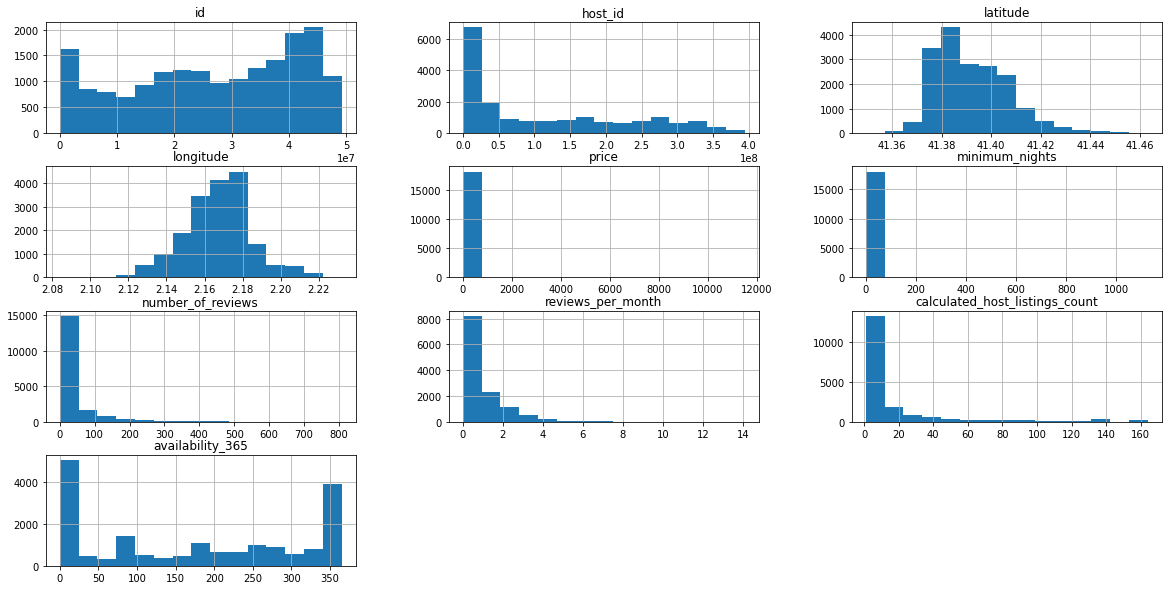

In [ ]:
# plotar o histograma das variáveis numéricas
df.hist(bins=15,figsize=(20,10));


### **Q4. Qual a média dos preços de aluguel?**

In [ ]:
# ver a média da coluna `price`
df.price.mean()


110.39196751892901

In [ ]:
df[['price','minimum_nights','number_of_reviews','reviews_per_month','calculated_host_listings_count','availability_365']].describe()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,18226.000000,18226.000000,18226.000000,12560.000000,18226.000000,18226.000000
mean,110.391968,12.290135,31.571601,0.916842,15.663009,175.077911
std,429.069933,29.085228,63.896632,1.094043,30.699142,141.168304
min,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,35.000000,1.000000,0.000000,0.140000,1.000000,2.000000
50%,55.000000,3.000000,3.000000,0.480000,3.000000,179.000000
75%,103.000000,30.000000,32.000000,1.340000,14.000000,318.000000
max,11500.000000,1124.000000,808.000000,14.070000,164.000000,365.000000


Analisando o resumo estatístico acima, algumas hipóteses são confirmadas:
* A variável price possui 75% do valor abaixo de 103, porém seu valor máximo são de 11.500;
* A quantidade máxima de noites (reviews_per_month) está acima de 365 dias no ano (1.124);

Boxplot para price

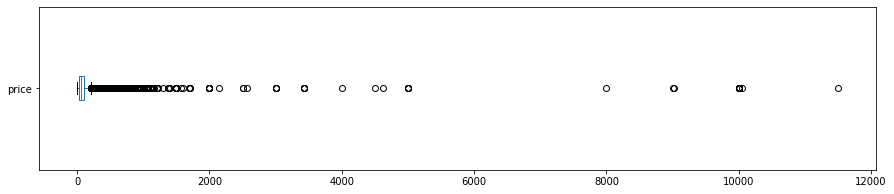


price: valores acima de 1500
61 entradas
0.3347%


In [ ]:
#price
df.price.plot(kind='box', vert=False, figsize=(15,3))
plt.show()

#ver quantidade de valores acima de 1500 para price
print("\nprice: valores acima de 1500")
print("{} entradas".format(len(df[df.price > 1500])))
print("{:.4f}%".format((len(df[df.price > 1500])/df.shape[0])*100))

Boxplot para minimum_nights

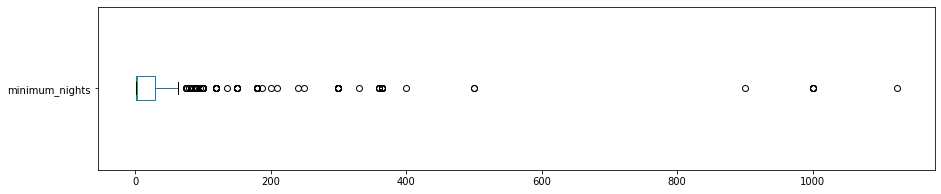

minimum_nights: valores acima de 90:
101 entradas
0.5542%


In [ ]:
# minimum_nights
df.minimum_nights.plot(kind='box',vert=False,figsize=(15,3))
plt.show()

# ver quantidade de valores acima de 90 dias para minimum_nights
print("minimum_nights: valores acima de 90:")
print("{} entradas".format(len(df[df.minimum_nights > 90])))
print("{:.4f}%".format((len(df[df.minimum_nights > 90]) / df.shape[0])*100))

**Histogramas sem outliers**

Foi identificado outliers nas variáveis "price" e "minimum_nights". Então agora o correto a se fazer é limpar o DataFrame e plotar novamente um histograma com uma foto que melhor represente o contexto.


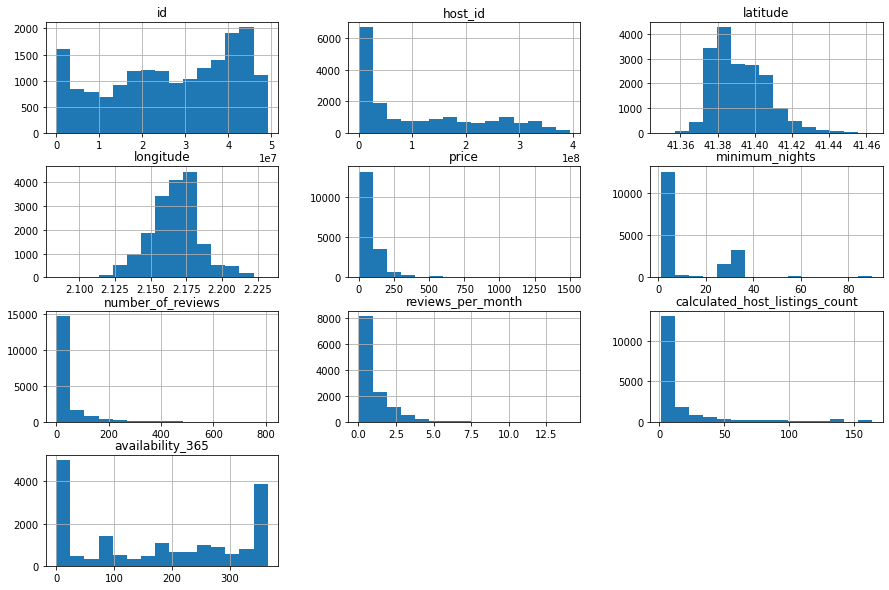

In [ ]:
# remover os outliers em um novo DataFrame
df_clean = df.copy()
df_clean.drop(df_clean[df_clean.price > 1500].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean.minimum_nights > 90].index, axis=0, inplace=True)

# remover 'neghbourhood_group', pois está vazio
df_clean.drop('neighbourhood_group',axis=1, inplace=True)

#plotar o histograma para as variáveis numéricas
df_clean.hist(bins=15, figsize=(15,10));

### **Q4. Qual a correlação existente entre as variáveis**

In [ ]:
# criar uma matriz de correlação
corr = df_clean[['price','minimum_nights','number_of_reviews','reviews_per_month','calculated_host_listings_count','availability_365']].corr()

# mostrar a matriz de correlação
display(corr)

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
price,1.000000,-0.125922,0.018302,0.010470,0.111011,0.072765
minimum_nights,-0.125922,1.000000,-0.232028,-0.248926,0.162004,0.134223
number_of_reviews,0.018302,-0.232028,1.000000,0.835553,-0.119881,0.056172
reviews_per_month,0.010470,-0.248926,0.835553,1.000000,-0.100522,0.070426
calculated_host_listings_count,0.111011,0.162004,-0.119881,-0.100522,1.000000,0.108777
availability_365,0.072765,0.134223,0.056172,0.070426,0.108777,1.000000


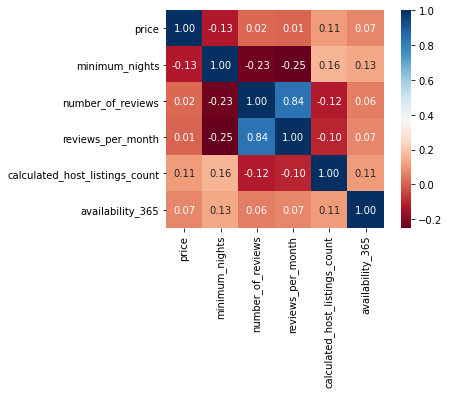

In [ ]:
# plotar um heatmap a partir das correlações
sns.heatmap(corr,cmap='RdBu',fmt='.2f', square=True, linecolor='white', annot=True);

### **Q5. Qual o tipo de imóvel mais alugado no Airbnb?**

In [ ]:
# mostrar a quantidade de cada tipo de imóvel disponível
df_clean.room_type.value_counts()

Entire home/apt    8900
Private room       8661
Hotel room          277
Shared room         226
Name: room_type, dtype: int64

In [ ]:
# mostrar a porcentagem de cada tipo de imóvel disponível
df_clean.room_type.value_counts() / df_clean.shape[0]

Entire home/apt    0.492693
Private room       0.479462
Hotel room         0.015334
Shared room        0.012511
Name: room_type, dtype: float64

### **Q6. Qual a localidade mais cara do dataset?**



In [ ]:
# ver preços por bairros, na média
df_clean.groupby(['neighbourhood']).price.mean().sort_values(ascending=False)[:10]

neighbourhood
Diagonal Mar i el Front Marítim del Poblenou    221.861878
Vallvidrera, el Tibidabo i les Planes           181.620690
la Vila Olímpica del Poblenou                   177.104651
la Marina del Prat Vermell                      142.714286
la Dreta de l'Eixample                          141.126113
la Font d'en Fargues                            119.384615
Pedralbes                                       108.185185
les Corts                                       104.232558
l'Antiga Esquerra de l'Eixample                 100.485159
la Vila de Gràcia                                97.717597
Name: price, dtype: float64

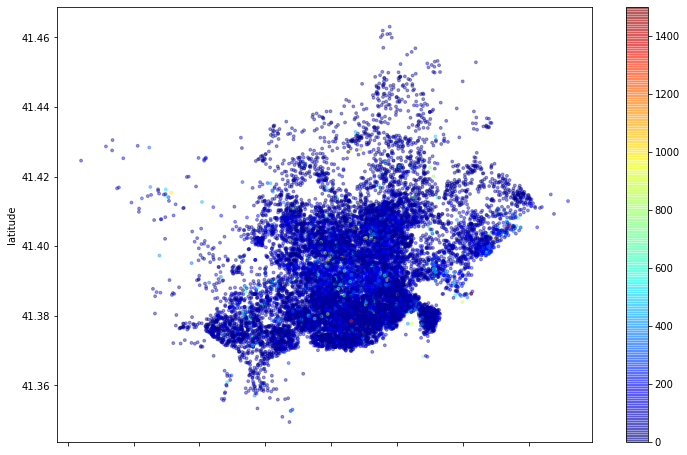

In [ ]:
# plotar os imóveis pela latitude-longitude
df_clean.plot(kind="scatter", x='longitude',y='latitude',alpha=0.4,c=df_clean['price'],s=8,cmap=plt.get_cmap('jet'),figsize=(12,8));

### **Q7. Qual é a média do mínimo de noites para aluguel (minimum_nights)?**

In [ ]:
# ver a média da coluna `minimum_nights`
df_clean.minimum_nights.mean()

10.91718334809566

In [ ]:
# ver a média da coluna `minimum_nights`
df_clean.price.mean()

89.57185562444641

## Conclusões


Identifiquei outliers nas variáveis (noites mínimas e preço). 
* Mais de 99% dos imóveis tinham "preço" inferior a 1500. Sem remover estes dados, a média de preço eram 110. Removendo, cai para 90;
* Mais de 99% dos imóveis tinham "noite mínima" inferior a 90. Sem remover estes dados, a média mínima de noites eram 110. Removendo, cai para 89;